In [2]:
import glob
import numpy as np
import multicam_calibration as mcc

### Calculate transform that sends floor points to XY plane

In [9]:
# load 3D pose
keypoint_path = '../../23_12_19_PFC_ACC/data/24_1_22_ACC5/24_1_22_ACC5.gimbal.npy'
keypoints = np.load(keypoint_path)

# calculate floor points (lowest point from each pose)
floor_points = mcc.get_floor_points(keypoints, z_points_down=True)

# get transform that moves floor points to xy plane
transform = mcc.flatibrate(floor_points)

# compose with 180 degree rotation so animals are above floor 
transform = mcc.flip_z_axis(transform)

# save transform
save_path = keypoint_path.replace('.gimbal.npy','.flatibration.npy')
np.save(save_path, transform)

### Visualize the results

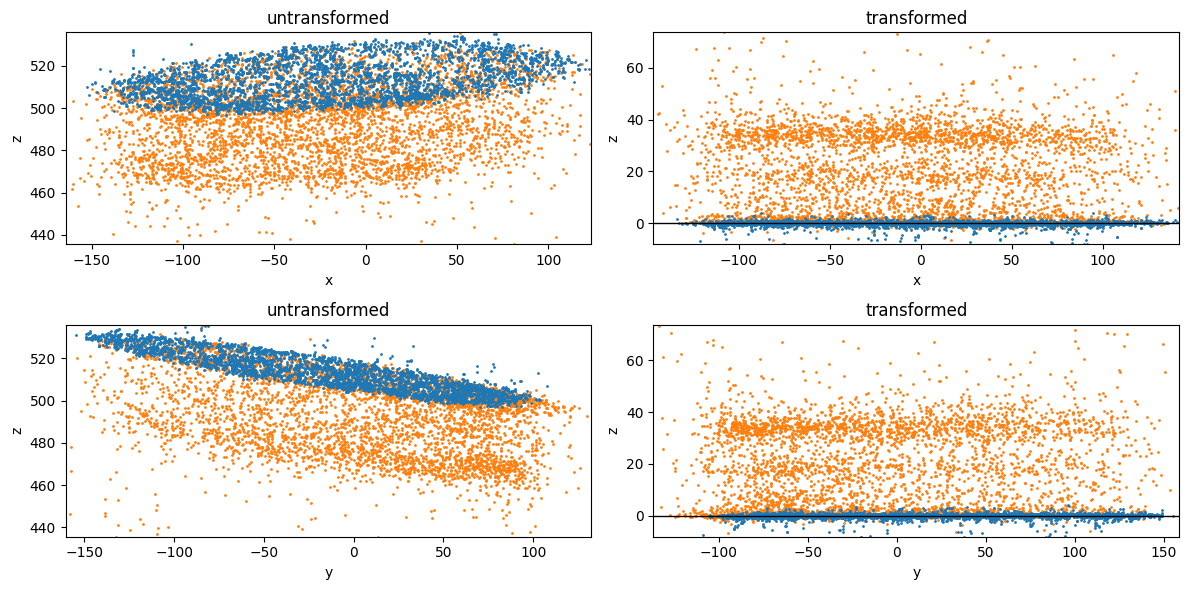

In [11]:
fig = mcc.visualize_flatibration(transform, floor_points, keypoints, max_points_to_plot=5000)
fig.savefig(keypoint_path.replace('.gimbal.npy','.flatibration_qc.jpg'))